# Load and preprocess data 

In [1]:
import pandas as pd
import numpy as np
# Ausschluss Probanden 1,4,10,18
# load .csv with all subjects and respiration info
df = pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/BekJan/respiratory_all.csv', header=0)
df.loc[:,('respiratory_rate /min')].astype(float)


0     13.78
1     13.78
2     13.20
3     15.27
4     13.53
      ...  
64    14.44
65    13.61
66    13.36
67    10.79
68    14.27
Name: respiratory_rate /min, Length: 69, dtype: float64

In [10]:
print(df)

    Subject Bedingung  respiratory_rate /min                            Time
0        20     water                  13.78   stressI_respiratory_rate /min
1        13     water                  13.78   stressI_respiratory_rate /min
2         3     music                  13.20   stressI_respiratory_rate /min
3        29     music                  15.27   stressI_respiratory_rate /min
4        14     music                  13.53   stressI_respiratory_rate /min
..      ...       ...                    ...                             ...
64        9     water                  14.44  stressII_respiratory_rate /min
65        4     water                  13.61  stressII_respiratory_rate /min
66       12     water                  13.36  stressII_respiratory_rate /min
67       28     music                  10.79  stressII_respiratory_rate /min
68       27     music                  14.27  stressII_respiratory_rate /min

[69 rows x 4 columns]


## Analysis of repiratory data

## Test for normal distribution

https://statistikguru.de/spss/mixed-anova/normalverteilung-ueberpruefen-4.html

The independent variable should be normally distributed in each group. If this is the case, results can be interpreted quite easily. If not, there are several studies that verify the conduction of ANOVA even though normally distribution is not met(Glass, Peckham, & Sanders, 1972; Harwell, Rubinstein, Hayes, & Olds, 1992; Salkind, 2010).

In our study, respiratory data seperated into two groups showed normal distribution (p>0,05).

Die unabhängige Variable sollte bei einer mixed ANOVA für jede Gruppe und für jede Stufe des Faktors etwa normalverteilt sein. Ist dies der Fall, so lassen sich die Ergebnisse am fehlerfreisten interpretieren. Allerdings gibt es auch genügend Belege aus aktuellen Studien, dass die ANOVA robust gegenüber einer Verletzung der Normalverteilung ist (Glass, Peckham, & Sanders, 1972; Harwell, Rubinstein, Hayes, & Olds, 1992; Salkind, 2010).

Bei den gemessenen Atmungs-Werten zeigt sich zwischen den Gruppen (Musik vs Wasser) eine Normalverteilung (p>0,05).

In [11]:
# check for a normally distributed sample (normality)
import pingouin as pg
pg.normality(df, group='Bedingung', dv='respiratory_rate /min')

,W,pval,normal
water,0.960785,0.271997,True
music,0.975809,0.603427,True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4847123400>]],
      dtype=object)

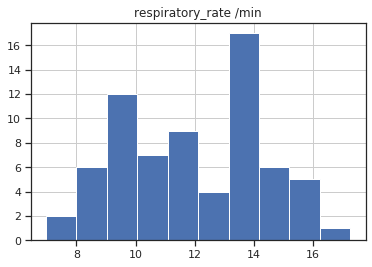

In [12]:
%matplotlib inline
df.hist(column='respiratory_rate /min')


In [15]:
# create df containig only subjects that listened to water sounds
df_norm_w=df.loc[(df['Bedingung'] == ('water'))]
print(df_norm_w)

    Subject Bedingung  respiratory_rate /min                            Time  \
0        20     water                  13.78   stressI_respiratory_rate /min   
1        13     water                  13.78   stressI_respiratory_rate /min   
5        15     water                   9.54   stressI_respiratory_rate /min   
7        25     water                  14.94   stressI_respiratory_rate /min   
8        21     water                  12.03   stressI_respiratory_rate /min   
9        22     water                  13.53   stressI_respiratory_rate /min   
13        5     water                  10.29   stressI_respiratory_rate /min   
15       17     water                  11.70   stressI_respiratory_rate /min   
18        9     water                  13.44   stressI_respiratory_rate /min   
19        4     water                  11.45   stressI_respiratory_rate /min   
20       12     water                  13.20   stressI_respiratory_rate /min   
23       20     water                   

In [16]:
# create df with subjects that listened to music
df_norm_m=df.loc[(df['Bedingung'] == ('music'))]
print(df_norm_m)

    Subject Bedingung  respiratory_rate /min                            Time  \
2         3     music                  13.20   stressI_respiratory_rate /min   
3        29     music                  15.27   stressI_respiratory_rate /min   
4        14     music                  13.53   stressI_respiratory_rate /min   
6        19     music                  17.26   stressI_respiratory_rate /min   
10       23     music                  13.86   stressI_respiratory_rate /min   
11       11     music                  11.54   stressI_respiratory_rate /min   
12       16     music                  10.95   stressI_respiratory_rate /min   
14       26     music                  13.61   stressI_respiratory_rate /min   
16        2     music                  13.61   stressI_respiratory_rate /min   
17       24     music                  13.78   stressI_respiratory_rate /min   
21       28     music                  11.12   stressI_respiratory_rate /min   
22       27     music                  1

In [17]:
# test for normality in group with music intervention
import pingouin as pg
pg.normality(df_norm_m, group='Time', dv='respiratory_rate /min')

,W,pval,normal
stressI_respiratory_rate /min,0.925343,0.333346,True
acoustic_respiratory_rate /min,0.951985,0.666157,True
stressII_respiratory_rate /min,0.945607,0.573911,True


In [18]:
#test for normality in group with water intervention
import pingouin as pg
pg.normality(df_norm_w, group='Time', dv='respiratory_rate /min')

,W,pval,normal
stressI_respiratory_rate /min,0.941925,0.543384,True
acoustic_respiratory_rate /min,0.961787,0.793773,True
stressII_respiratory_rate /min,0.931973,0.431153,True


## Test for homoscedasticity

There was homogeneity of the error variances, as assessed by Levene’s test (p > .05).

Homogenität der Varianzen lag vor. 

Homogenität der Fehlervarianzen der einzelnen Gruppen war gemäß dem Levene-Test für alle Variablen erfüllt (p > .05).

In [19]:
pg.homoscedasticity(df, group='Time', dv='respiratory_rate /min')

,W,pval,equal_var
levene,1.852,0.164921,True


In [20]:
# check for equal variances (homoscedasticity)
pg.homoscedasticity(df_norm_w, group='Time', dv='respiratory_rate /min')

,W,pval,equal_var
levene,0.918,0.410299,True


In [21]:
# check for equal variances (homoscedasticity)
pg.homoscedasticity(df_norm_m, group='Time', dv='respiratory_rate /min')

,W,pval,equal_var
levene,1.042,0.36405,True


## Test for sphericity

Sphericity was met.

Sphärizität liegt vor.

In [22]:
pg.sphericity(df, subject='Subject', dv='respiratory_rate /min', within='Time')

(True, 0.881, 2.656, 2, 0.26497082478573863)

## Descriptive statistics

[]

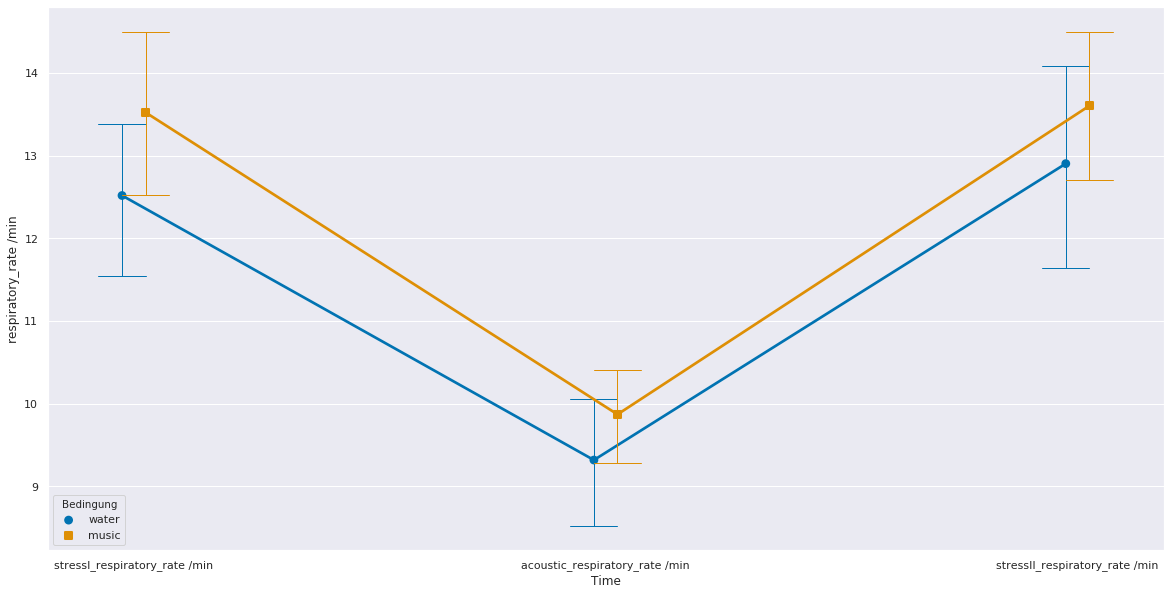

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
sns.set()
sns.pointplot(data=df, x='Time', y='respiratory_rate /min', hue='Bedingung', dodge=True, markers=['o', 's'], capsize=.1, errwidth=1, palette='colorblind')
plt.plot()

In [24]:
df.groupby(['Time', 'Bedingung'])['respiratory_rate /min'].agg(['mean', 'std']).round(2)

mean   std
Time                           Bedingung             
acoustic_respiratory_rate /min music       9.87  1.02
                               water       9.32  1.34
stressII_respiratory_rate /min music      13.60  1.68
                               water      12.90  2.20
stressI_respiratory_rate /min  music      13.52  1.77
                               water      12.52  1.65

# Conduct a mixed (split-plot) ANOVA 

There was no statistically significant interaction between time and group, punc = 0,759, eps0,894.

Es gab keine statistisch signifikante Interaktion zwischen der Zeit und den Untersuchungsgruppen (punc=0,759, eps=0,894) .



In [26]:
# https://raphaelvallat.com/pingouin.html
#  dv:  A dependent variable: Cortisol
#  within: A within-group variable, Time
#  between:  A between-group variable, Group, with two levels (music, water)
#  subject:  A subject variable, Subject

# https://github.com/raphaelvallat/pingouin/blob/master/notebooks/01_ANOVA.ipynb

import pingouin as pg
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='respiratory_rate /min', within='Time', between='Bedingung', subject='Subject', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source            SS    DF1    DF2      MS       F    p-unc    np2  eps
-----------  -------  -----  -----  ------  ------  -------  -----  -----
Bedingung      9.739      1     21   9.739   1.647    0.213  0.073  -
Time         193.757      2     42  96.879  88.006    0.000  0.807  0.894
Interaction    0.611      2     42   0.306   0.278    0.759  0.013  -



## Conduct repeated measure ANOVAs for the seperate groups (music and water)

The rm-ANOVA shows a significant difference between the stresstests and the acoustic intervention (p< 0,05) The post hoc tests show the significance for conditions acoustic - stressI and acoustic - stressII but no significance between the two stresstests.

Die RM ANOVA zeigte eine signifikante Interaktion bei der Analyse der einzelnen Zeitpunkte in den separierten Gruppen. Es liegt also eine signifikante Änderung der Atmung jeweils mit Änderung der Kondition in beiden Gruppen vor (p< 0,05), wie die post hoc Tests zeigen. Hierbei liegt der Unterschied jeweils zwischen den Bedingungen Akustik - StressI/II.


In [27]:
import pingouin as pg
# Compute the two-way mixed-design ANOVA
prepost = pg.rm_anova(dv='respiratory_rate /min', within='Time', subject='Subject', data=df_norm_m)
# Pretty printing of ANOVA summary
pg.print_table(prepost)


ANOVA SUMMARY

Source      ddof1    ddof2       F    p-unc    np2    eps
--------  -------  -------  ------  -------  -----  -----
Time            2       22  36.620    0.000  0.769  0.901



In [28]:
t=pg.pairwise_ttests(dv='respiratory_rate /min', within='Time', subject='Subject', data=df_norm_m)
pg.print_table(t)


POST HOC TESTS

Contrast    A                               B                               Paired    Parametric         T     dof  Tail         p-unc      BF10    hedges
----------  ------------------------------  ------------------------------  --------  ------------  ------  ------  ---------  -------  --------  --------
Time        stressI_respiratory_rate /min   acoustic_respiratory_rate /min  True      True           7.767  11.000  two-sided    0.000  2454.111     2.524
Time        stressI_respiratory_rate /min   stressII_respiratory_rate /min  True      True          -0.183  11.000  two-sided    0.858     0.292    -0.045
Time        acoustic_respiratory_rate /min  stressII_respiratory_rate /min  True      True          -6.504  11.000  two-sided    0.000   588.728    -2.673



In [29]:
import pingouin as pg
# Compute the two-way mixed-design ANOVA
prepost_w = pg.rm_anova(dv='respiratory_rate /min', within='Time', subject='Subject', data=df_norm_w)
# Pretty printing of ANOVA summary
pg.print_table(prepost_w)


ANOVA SUMMARY

Source      ddof1    ddof2       F    p-unc    np2    eps
--------  -------  -------  ------  -------  -----  -----
Time            2       20  63.363    0.000  0.864  0.841



In [30]:
t_w=pg.pairwise_ttests(dv='respiratory_rate /min', within='Time', subject='Subject', data=df_norm_w)
pg.print_table(t_w)


POST HOC TESTS

Contrast    A                               B                               Paired    Parametric         T     dof  Tail         p-unc       BF10    hedges
----------  ------------------------------  ------------------------------  --------  ------------  ------  ------  ---------  -------  ---------  --------
Time        stressI_respiratory_rate /min   acoustic_respiratory_rate /min  True      True          10.563  10.000  two-sided    0.000  16670.000     2.062
Time        stressI_respiratory_rate /min   stressII_respiratory_rate /min  True      True          -1.219  10.000  two-sided    0.251      0.543    -0.193
Time        acoustic_respiratory_rate /min  stressII_respiratory_rate /min  True      True          -8.567  10.000  two-sided    0.000   3123.429    -1.953

